In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('../db/walmart.db')
df = pd.read_sql('Select * FROM walmart_sales', conn, parse_dates =['Date'])
conn.close()
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [2]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

<Axes: title={'center': 'Total Weekly Sales Over Time'}, xlabel='Date'>

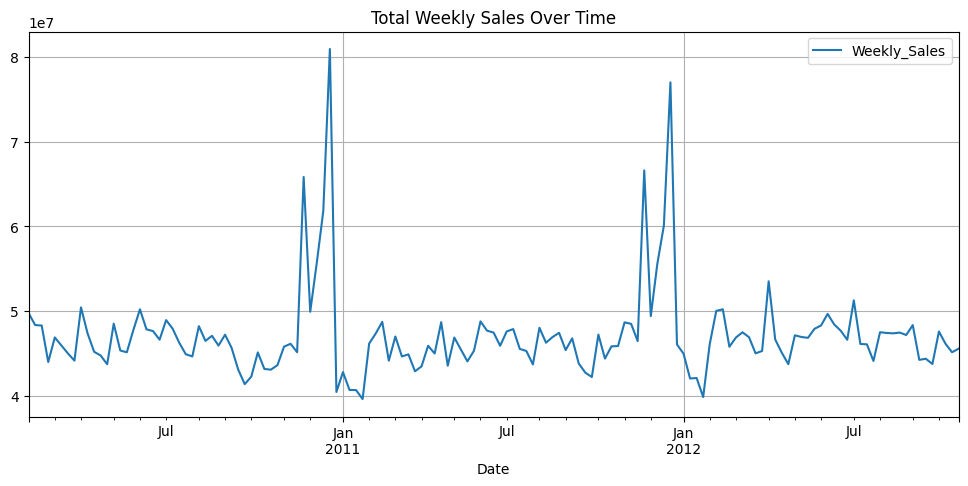

In [3]:
#
ts = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
ts.plot(
    x='Date',
    y='Weekly_Sales',
    figsize=(12,5),
    grid = True,
    title= 'Total Weekly Sales Over Time'
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '20'),
  Text(1, 0, '4'),
  Text(2, 0, '14'),
  Text(3, 0, '13'),
  Text(4, 0, '2'),
  Text(5, 0, '10'),
  Text(6, 0, '27'),
  Text(7, 0, '6'),
  Text(8, 0, '1'),
  Text(9, 0, '39')])

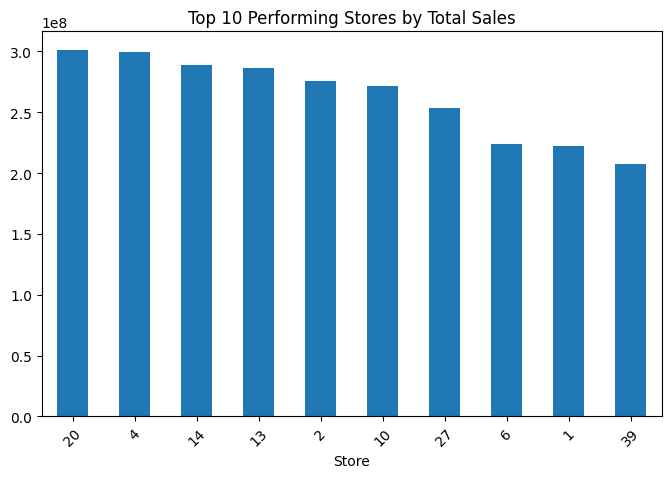

In [4]:
# top 10 stores by total stores (heavy hitters)
top10_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
top10_stores.plot(
    kind ='bar',
    figsize =(8,5),
    title='Top 10 Performing Stores by Total Sales'
)
plt.xticks(rotation = 45)